<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

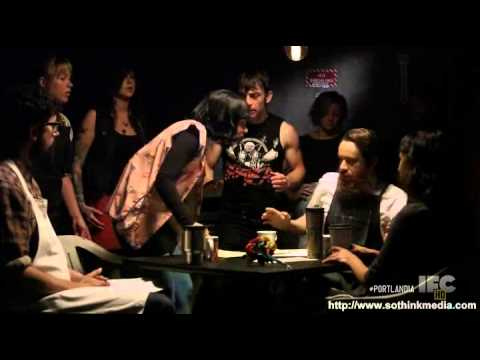

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'/Users/loris/Documents/Lambda School/Unit-4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [200]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [158]:
shops.shape

(7616, 3)

In [201]:
# Remove 'star rating' and float point from star_rating
shops["star_rating"] = shops["star_rating"].apply(lambda x: x.strip('.0 star rating'))

In [304]:
# Convert star_rating to int
shops["star_rating"] = shops["star_rating"].astype(int)

In [202]:
# Remove dates and listed checkins from full_review_text
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lstrip(' 1234567890/ check-ins').strip())

In [203]:
# Tokenize data

# Imports
import spacy
from spacy.tokenizer import Tokenizer

# Load NLP
nlp = spacy.load("en_core_web_lg")

# Create tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [204]:
# Tokenizer Pipe

tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [164]:
# Create word count function

# Imports
from collections import Counter

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [205]:
wc = count(shops['tokens'])

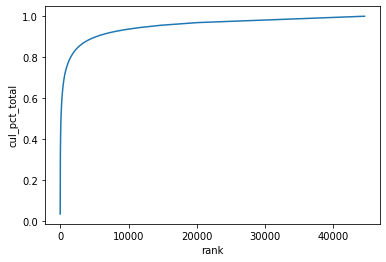

In [166]:
# Create visualization
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# cumulative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

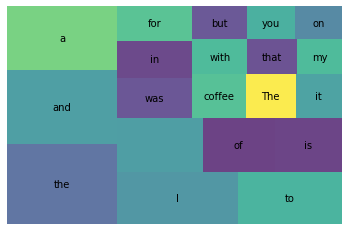

In [110]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

In [206]:
# Update tokens column to remove stop words

tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

shops['tokens'] = tokens
     

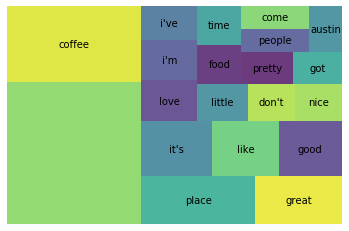

In [118]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

In [207]:
# Update tokens to remove punctuation

import re

def standardize(column):
    col_tokens = []
    for doc in column:
        doc_tokens = []
        for token in doc:
            tokens = re.sub(r'[^a-zA-Z ^0-9]', '', token)
            if token != " ": doc_tokens.append(tokens)
        col_tokens.append(doc_tokens)
    return col_tokens


In [208]:
shops['tokens'] = standardize(shops['tokens'])

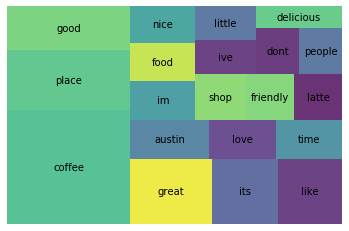

In [194]:
# Update visual with baseline tokens
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

In [263]:
# Add custom stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'austin', ' '])

tokens = []

for doc in shops['tokens']:
    doc_tokens = []
    for token in doc:
        if token not in STOP_WORDS:
            doc_tokens.append(token)
    tokens.append(doc_tokens)

shops['tokens'] = tokens

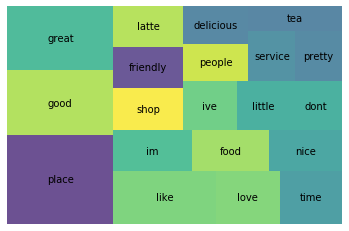

In [214]:
# Update visual with baseline tokens
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

In [218]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stems = []

for doc in shops['tokens']:
    doc_stems = []
    for token in doc:
        doc_stems.append(ps.stem(token))
    stems.append(doc_stems)

shops['stems'] = stems
        

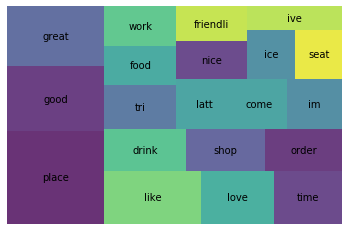

In [219]:
# Look at visual of stems
wc = count(shops['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

In [233]:
# Lemmatization
def get_lemmas(text):
    lemmas = []
    for doc in text:
        docs = []
        doc_lemmas = []
        token = nlp(doc)
        for token in doc:
            if token.pos_ != 'PRON':
                doc_lemmas.append(token.lemma_)
        lemmas.append(doc_lemmas)
    return lemmas

In [298]:
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.lemma_ != '-PRON-')):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [299]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

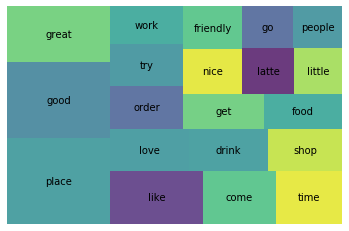

In [276]:
# Look at visual of lemmas
wc = count(shops['lemmas'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [311]:
# Overall Token count:
good = shops[shops['star_rating'] >= 4]
bad = shops[shops['star_rating'] < 4]

In [313]:
good_wc = count(good['lemmas'])
bad_wc = count(bad['lemmas'])

In [317]:
bad_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
20,place,755,1231,1.0,0.016205,0.016205,0.511518
18,good,646,1000,2.0,0.013164,0.029369,0.437669
33,like,596,945,3.0,0.012440,0.041809,0.403794
150,order,431,764,4.0,0.010057,0.051867,0.292005
42,come,452,651,5.0,0.008570,0.060437,0.306233
185,time,425,617,6.0,0.008122,0.068559,0.287940
19,drink,365,612,7.0,0.008056,0.076615,0.247290
84,food,324,507,8.0,0.006674,0.083289,0.219512
136,great,348,472,9.0,0.006213,0.089503,0.235772
4,service,347,450,10.0,0.005924,0.095427,0.235095


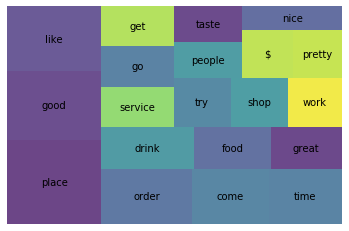

In [319]:
# Create visualization for 1-3 star 

wc_top20 = bad_wc[bad_wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

In [318]:
good_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
71,place,3129,4809,1.0,0.018006,0.018006,0.509609
180,good,2959,4418,2.0,0.016542,0.034547,0.481922
118,great,2512,3488,3.0,0.013060,0.047607,0.409121
193,like,1677,2434,4.0,0.009113,0.056720,0.273127
10,love,1612,2132,5.0,0.007982,0.064702,0.262541
359,come,1481,1989,6.0,0.007447,0.072149,0.241205
31,shop,1334,1784,7.0,0.006680,0.078829,0.217264
353,time,1344,1778,8.0,0.006657,0.085486,0.218893
18,drink,1273,1730,9.0,0.006477,0.091963,0.207329
123,try,1331,1712,10.0,0.006410,0.098373,0.216775


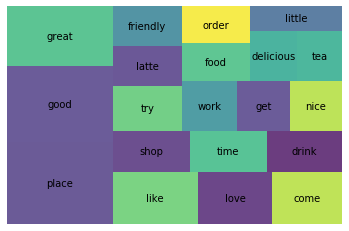

In [320]:
# Create visualization for 4 & 5 ratings

wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [323]:
wc = count(shops['lemmas'])

In [345]:
shops.groupby(['coffee_shop_name'])

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

